# PIVpy getting started notebook:

This notebook shows an example of how one can use vecpy in order to load manipulate and display analyzed PIV data. 

### step 1 - import pivpy and dependencies

here we import the package code so that we can use it next 

In [1]:
import os, sys 
# sys.path.append(os.path.abspath('../'))

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from pivpy import io, pivpy, graphics

# for the sake of this tutorial, ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

### step 2 - load the tests data

In order to load the data, first we need to set up the path to the data directory. Following that we need to get a list of files names that we would like to view/analyze. Finally we very quickly load the data in to a list of vec instances.

In [27]:
# pointer to the directory with the data
import pkg_resources as pkg
path_to_data  = pkg.resource_filename('pivpy','data/Insight')
# list the directory
os.listdir(path_to_data)

['Run000001.T000.D000.P000.H001.L.vec',
 'Run000004.T000.D000.P000.H001.L.vec',
 'Run000005.T000.D000.P000.H001.L.vec',
 'Run000002.T000.D000.P000.H001.L.vec',
 'Run000003.T000.D000.P000.H001.L.vec',
 '.ipynb_checkpoints']

In [28]:
# let's read only the files from the Run* 
data = io.load_directory(path_to_data) # you can add also: basename='day2a*',ext='.vec')

In [4]:
# let's check if it's read:
data.attrs['files']

['/home/user/miniconda3/envs/pivpy/lib/python3.7/site-packages/pivpy-0.0.6-py3.7.egg/pivpy/data/Run000001.T000.D000.P000.H001.L.vec',
 '/home/user/miniconda3/envs/pivpy/lib/python3.7/site-packages/pivpy-0.0.6-py3.7.egg/pivpy/data/Run000002.T000.D000.P000.H001.L.vec',
 '/home/user/miniconda3/envs/pivpy/lib/python3.7/site-packages/pivpy-0.0.6-py3.7.egg/pivpy/data/Run000003.T000.D000.P000.H001.L.vec',
 '/home/user/miniconda3/envs/pivpy/lib/python3.7/site-packages/pivpy-0.0.6-py3.7.egg/pivpy/data/Run000004.T000.D000.P000.H001.L.vec',
 '/home/user/miniconda3/envs/pivpy/lib/python3.7/site-packages/pivpy-0.0.6-py3.7.egg/pivpy/data/Run000005.T000.D000.P000.H001.L.vec']

### step 3 - plot some arrows

first things first - show a quiver plot

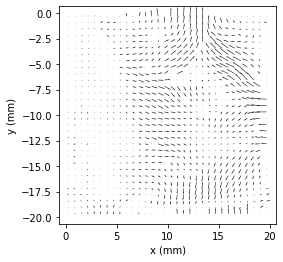

In [5]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=20)

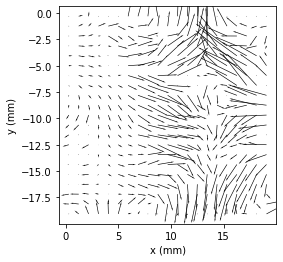

In [6]:
fig, ax = graphics.quiver(data, nthArr=3, arrScale=5)

In [7]:
# we can read also a single file only into a 1 frame dataset
d = io.load_vec(os.path.join(path_to_data,'Run000001.T000.D000.P000.H001.L.vec'))

ValueError: too many values to unpack (expected 2)

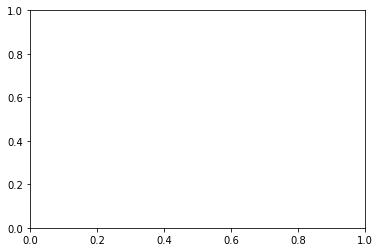

In [8]:
graphics.quiver(d,arrScale=10)

In [ ]:
d.isel(t=0).differentiate(coord='x').differentiate(coord='y')['u'].plot.pcolormesh()

and a vorticity map

In [ ]:
# prepare vorticity
d.piv.vec2scal(property='curl') # it will appear as d['w'] variable, 'w' for all scalar properties

# plot
fig, ax = graphics.contour_plot(d)

Also, velocity histograms in x and y directions

In [ ]:
fig, ax = graphics.histogram(data, normed = True)

We can also plot a whole list of vec's as subplots:

In [ ]:
fig, ax = graphics.quiver(data, nthArr=4, arrScale=10)
fig.set_size_inches(10, 6)

# Last but not least - manipulation

lets create a linear combinatino of our data and then see how to manipulate the coordinate system

__Addition and Scalar multiplication__

In [ ]:
v = (data + 3*data - 2 * data.isel(t=0)) / 3.
graphics.quiver(v, arrScale=10,units=data.attrs['units'])

__Crop__

In [ ]:
v = v.piv.crop([5,15,-5,-15])  #(xmin, xmax, ymin, ymax)
graphics.quiver(v, arrScale=10,units=data.attrs['units'])

__Rotate__

In [ ]:
# v.piv.rotate(90) # not implemented

__Translation of Coordinate System__

In [ ]:
# we can also use some default plot from xarray
data.piv.vorticity()
data.isel(t=0)['w'].plot(robust=True)

In [ ]:
# low level quiver
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[:,:,0], -data.v[:,:,0] ,data.u[:,:,0]**2 + data.v[:,:,0]**2,scale=.75)
plt.gca().invert_yaxis()

In [ ]:
test = io.create_sample_field(rows=25,cols=5)

In [ ]:
graphics.quiver(test,arrScale=5,aspectratio='auto')

In [ ]:
data = io.load_vec(os.path.join(path_to_data,'exp1_001_b.vec'))
data

In [ ]:
# def parse_header(filename):
""" 
parse_header ( filename)
Parses header of the file (.vec) to get the variables (typically X,Y,U,V)
and units (can be m,mm, pix/dt or mm/sec, etc.), and the size of the dataset
by the number of rows and columns.
Input:
    filename : complete path of the file to read
Returns:
    variables : list of strings
    units : list of strings
    rows : number of rows of the dataset
    cols : number of columns of the dataset 
    dt   : time interval between the two PIV frames in microseconds
"""

import re
filename = os.path.join(path_to_data,'exp1_001_b.vec')

# split path from the filename
fname = os.path.basename(filename)
print(fname)
# get the number in a filename if it's a .vec file from Insight
if '.' in fname[:-4]: # day2a005003.T000.D000.P003.H001.L.vec
    frame = int(re.findall(r'\d+',fname.split('.')[0])[-1])
elif '_' in filename[:-4]:
    frame = int(re.findall(r'\d+',fname.split('_')[1])[-1]) # exp1_001_b.vec, .txt

with open(filename) as fid:
    header = fid.readline()

# if the file does not have a header, can be from OpenPIV or elsewhere
# return None 
if header[:5] != 'TITLE':
    print (['x','y','u','v'],'','','',None,frame)
    

header_list = header.replace(',',' ').replace('=',' ').replace('"',' ').split()

# get variable names, typically X,Y,U,V
variables = header_list[3:12][::2]

# get units - this is important if it's mm or m/s 
units = header_list[4:12][::2]

# get the size of the PIV grid in rows x cols 
rows = int(header_list[-5])
cols = int(header_list[-3])

# this is also important to know the time interval, dt
ind1 = header.find('MicrosecondsPerDeltaT')
dt = float(header[ind1:].split('"')[1])


print (variables, units, rows, cols, dt, frame)

In [ ]:
variables,units,rows,cols, dt, frame = io.parse_header(os.path.join(path_to_data,'exp1_001_b.vec'))
variables,units,rows,cols, dt, frame

In [ ]:
data.piv.quiver()